# Risk

The purpose of this assignment to generate some code to mirror a round of the board game "Risk".

## Import libraries
---

In [269]:
# Data frames.
import pandas as pd

# Nummerical arrays
import numpy as np

#Graphs
import matplotlib.pyplot as plt


## Generating Dice Rolls
---

In [270]:
n_repeats = 1000
rng = np.random.default_rng()


for option in options:
    attack = rng.integers(1, 7, size=(n_repeats,3)) # generate random dice rolls for the attacker's dice
    attack.sort() # sort the attackers dice so that they are in order
    attack = np.flip(attack, axis=1) # flip the dice so that the higher dice are to the top of the array
    print(attack)
    defence = rng.integers(1, 7, size=(n_repeats,2)) # generate random dice rolls for the defender's dice
    defence.sort() # sort the defenders dice so that they are in order
    defence = np.flip(defence, axis=1) # flip the dice so that the higher dice are to the top of the array
    print(defence)





[[6 5 5]
 [6 5 2]
 [6 2 1]
 ...
 [4 1 1]
 [6 4 2]
 [1 1 1]]
[[4 2]
 [5 2]
 [4 3]
 ...
 [6 5]
 [4 3]
 [2 2]]


In [271]:
    min_length = min(attack.shape[1], defence.shape[1])
    result = attack[:, :min_length] > defence[:, :min_length]
    print(result)
    print()

[[ True  True]
 [ True  True]
 [ True False]
 ...
 [False False]
 [ True  True]
 [False False]]



In [272]:
outcome = np.count_nonzero(result > 0, axis=1)

awins = np.count_nonzero(outcome == 2)
print("Attacker wins:", awins)
dwins = np.count_nonzero(outcome == 0)
print("Defender wins:", dwins)
draw = np.count_nonzero(outcome == 1)
print("Draws:", draw)

Attacker wins: 323
Defender wins: 321
Draws: 356


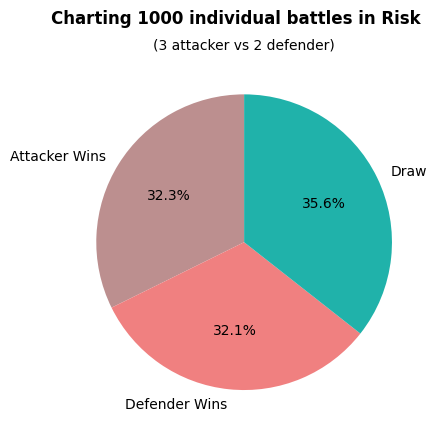

In [287]:
# Assume 'df' is your Pandas DataFrame with multiple features
wld = ['Attacker Wins', 'Defender Wins', 'Draw']
values = [awins, dwins, draw]  

total = sum(values)
values = [v / total * 100 for v in values]

# Create the pie chart
plt.pie(values, labels=wld, autopct='%1.1f%%', colors=['rosybrown', 'lightcoral', 'lightseagreen'], startangle=90)

plt.suptitle('Charting 1000 individual battles in Risk', fontweight='bold')
plt.title('(3 attacker vs 2 defender)', fontsize=10)
plt.show()